# Prelude
Now that I know that my Jupyter notebook will be submitted, I will try my best to organize my code hahahhaha. Also, as suggested by sir Rene, I will automate my code by putting all the processes in functions.

# Acknowledgements

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import RegularPolygon

N = 400
image_repository  = "./Images/"

# Start of Code
First importng the needed libraries.

# What each of my functions do



##### ${\tt show\_fft(A, title)}$
> Takes in  two arguements: ${\tt A}$ and ${\tt title}$. <br>
> Gets a binary image of size $(N, N)$ and plots the image, its 2D Fourier Transform, Shifted 2D Fourier Transform, and Shifted 2D Fourier Transform in a logarithmic scale. <br>
> <br>
> Arguments: <br>
> $\;\;\;\;$ ${\tt A}$: The aperture that will be transofrmed using 2D FFT. <br>
> $\;\;\;\;$ ${\tt title}$: Serves as the title of the output graph

In [91]:
def show_fft(A, title):
    # Applying fft
    FA = abs(np.fft.fft2(A))
    
    # Shifting 
    FAshifted = np.fft.fftshift(FA)
    
    # Plotting
    fig, ax = plt.subplots(1,4, figsize = (20,5))
    ax[0].imshow(A, cmap = "gray")
    ax[0].set_title(title)
    
    ax[1].imshow(FA, cmap = "inferno")
    ax[1].set_title("Fourier Transform", pad = 10)
    
    ax[2].imshow(FAshifted, cmap = "inferno")
    ax[2].set_title("Shifted Fourier Transform", pad = 10)
    
    ax[3].imshow(np.log(FAshifted), cmap = "inferno")
    ax[3].set_title("[Log scale] Shifted Fourier Transform", pad = 10)
    plt.tight_layout()
    plt.show()
    

##### ${\tt circ(radius)}$:
> Takes in one arguement: ${\tt radius}$. <br>
> Outputs a circular aperture centerted at the middle of the image. The image has a size of $N \times N$ <br>
> <br>
> Arguments <br>
> $\;\;\;\;$ ${\tt radius}$: Accepts any real number. Preferabley in the range $(0, 100)$.

In [92]:
def circ(radius):                   
    x = np.linspace(-100, 100, num = N)
    y = x
    X,Y = np.meshgrid(x,y)
    A = np.zeros((N,N))

    R = np.sqrt(X**2 + Y**2)

    # Making the image
    A[R < radius] = 1
    
    return A

##### ${\tt sinusoid(freq, rotate)}$:
> Takes in two arguements: ${\tt freq}$ and ${\tt rotate}$. <br>
> Outputs a sinusoidal aperture centerted that is rotated at $2\pi$ by default. The image has a side length of $2\pi$ cm. <br>
> <br>
> <br>
> ${\tt Arguments}$ <br>
> $\;\;\;\;$ ${\tt freq}$: Accepts any real number. Frequency of the sinusoid. <br>
> $\;\;\;\;$ ${\tt rotate}$: Accepts any real number. Angle of rotation in radians. Positive inputs rotates the sinusoid counterclockwise. <br>
> <br>
> <br>
> ${\tt Notes}$<br>
> The code used in this function was derived from Rene Principe's code. <br>
> $\;\;\;\;$ Source: https://rlprincipe.wixsite.com/reneprincipejr/fourier-transform

In [93]:
def sinusoid(freq, rotate = 2*np.pi):
    x = np.linspace(0, 2*np.pi,num = N)
    y = x
    X,Y = np.meshgrid(x,y)
    R = np.sin(freq*(Y*np.sin(rotate)-X*np.cos(rotate)))
    return R



##### ${\tt conv\_gs(filename)}$:
> Takes in two arguement: ${\tt filename}$ and ${\tt binary}$. <br>
> Returns a grayscale image and resizes it to $256 \times 256$
> <br>
> <br>
> ${\tt Arguments}$ <br>
> $\;\;\;\;$ ${\tt filename}$: Must be string. Pretty self explanatory lmao<br>

In [130]:
def conv_gs(filename, bw = False, inv = False):
    image = Image.open(image_repository + filename)
    gs_image = np.array(image.convert('L'))
    gs_image = np.array(Image.fromarray(gs_image).resize(size = (400,400)))
    
    if bw == True:
        gs_image = (gs_image - np.min(gs_image))/(np.max(gs_image) - np.min(gs_image))
        gs_image[gs_image > 0.8] = 1
        gs_image[gs_image <= 0.8] = 0
        
        
    if bw == True and inv == True:
        gs_image = gs_image - 1
        gs_image = gs_image*(-1)
        
        
    if bin == False and inv == True:
        print("lmao cant do that.")
    return gs_image

In [95]:
def image_fft(A, title):
    
    # Applying fft
    FA = np.fft.fft2(A)
    FA2 = np.fft.fft2(FA)
    inv_FA = np.fft.ifft2(FA)
    
    # Shifting 
    FAshifted = np.fft.fftshift(abs(FA))
    FAshifted2 = np.fft.fftshift(abs(FA))
    # inv_FAshifted2 = np.fft.fftshift(abs(inv_FA2))
    
    
    # Plotting
    fig, ax = plt.subplots(1,4, figsize = (20,5))
    ax[0].imshow(A, cmap = "gray")
    ax[0].set_title(title)
    
    ax[1].imshow(FAshifted, cmap = "inferno")
    ax[1].set_title("Fourier Transform", pad = 10)
    
    ax[2].imshow(abs(FA2), cmap = "gray")
    ax[2].set_title("Second Fourier Transform", pad = 10)
    
    ax[3].imshow(abs(inv_FA), cmap = "gray")
    ax[3].set_title("Inverse Fourier Transform of the \n First Fourier Transform", pad = 10)
    plt.tight_layout()
    plt.show()

In [128]:
def convolve(A, aperture, title):
    FA = np.fft.fft2(A)
    FAshifted = np.fft.fftshift(abs(FA))
    apertureshift = np.fft.fftshift(abs(aperture))
    
    convolved = FA*apertureshift
    reconstruction = abs(np.fft.ifft2(convolved))
    # reconstruction = np.fft.fftshift(abs(reconstruction))
    
    fig, ax = plt.subplots(1,4, figsize = (20,5))
    ax[0].imshow(A, cmap = "gray")
    ax[0].set_title(title)
    
    ax[1].imshow(abs(FAshifted), cmap = "inferno")
    ax[1].set_title("Fourier Transform", pad = 10)
    
    ax[2].imshow(aperture, cmap = "inferno")
    ax[2].set_title("Aperture", pad = 10)
    
    ax[3].imshow(reconstruction, cmap = "gray")
    ax[3].set_title("Convolved Image", pad = 10)
    plt.tight_layout()
    plt.show()

# Outputs are here

#### Fourier Transforms of a circular aperture

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20168\296249475.py:19: RuntimeWarning: divide by zero encountered in log
  ax[3].imshow(np.log(FAshifted), cmap = "inferno")


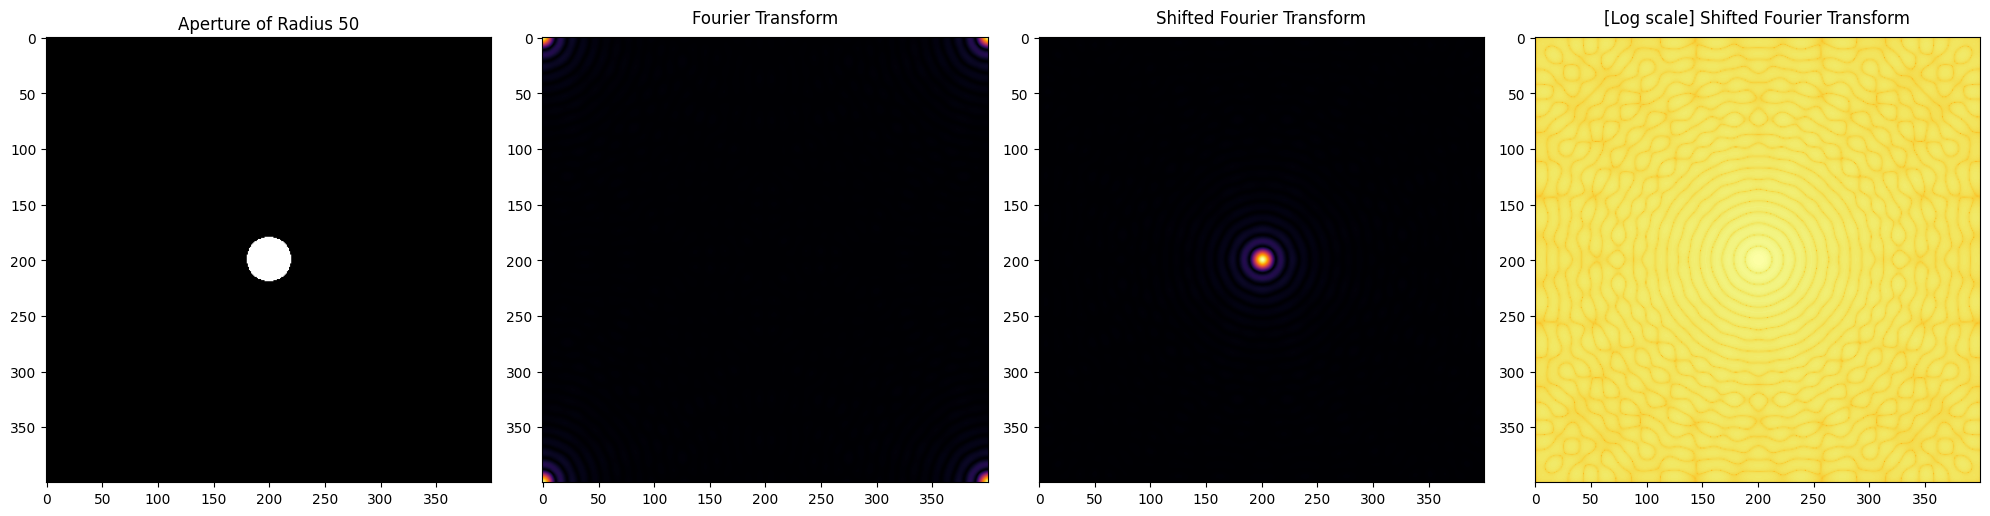

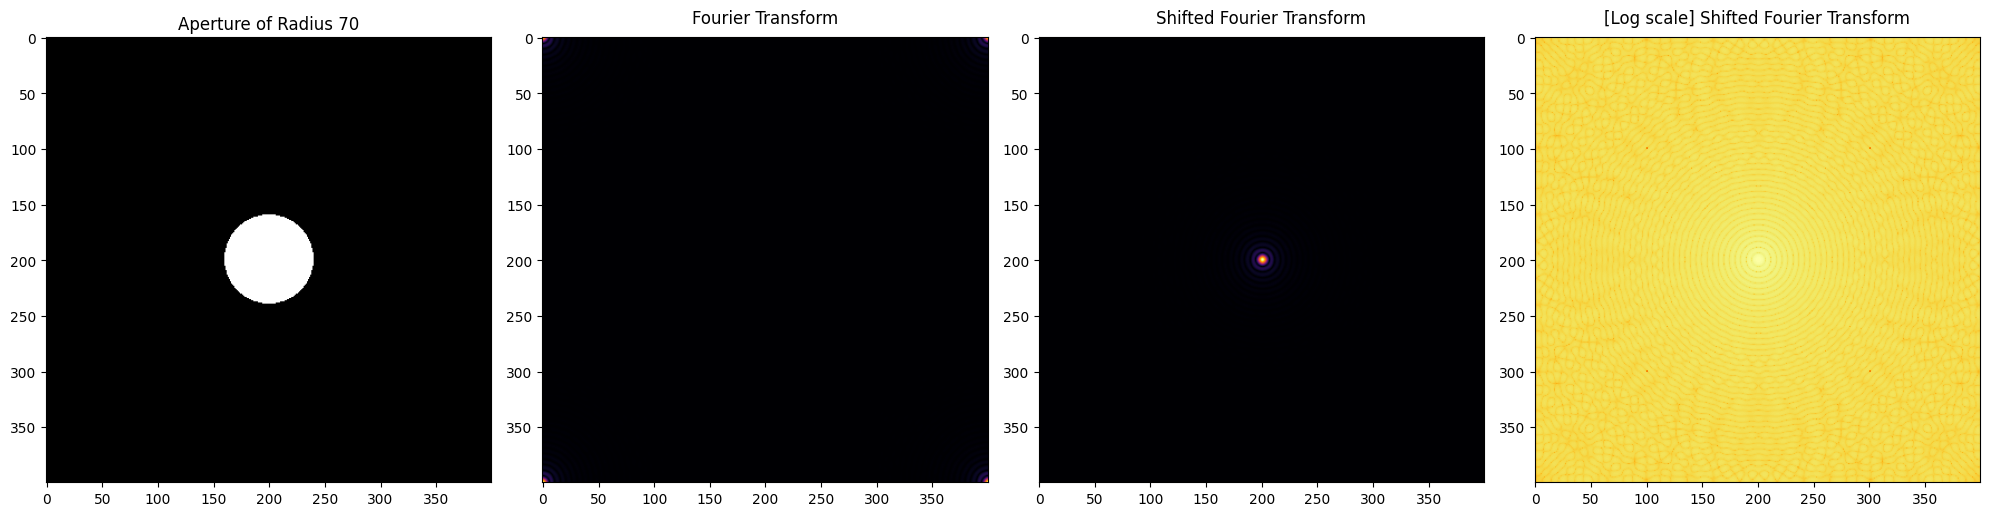

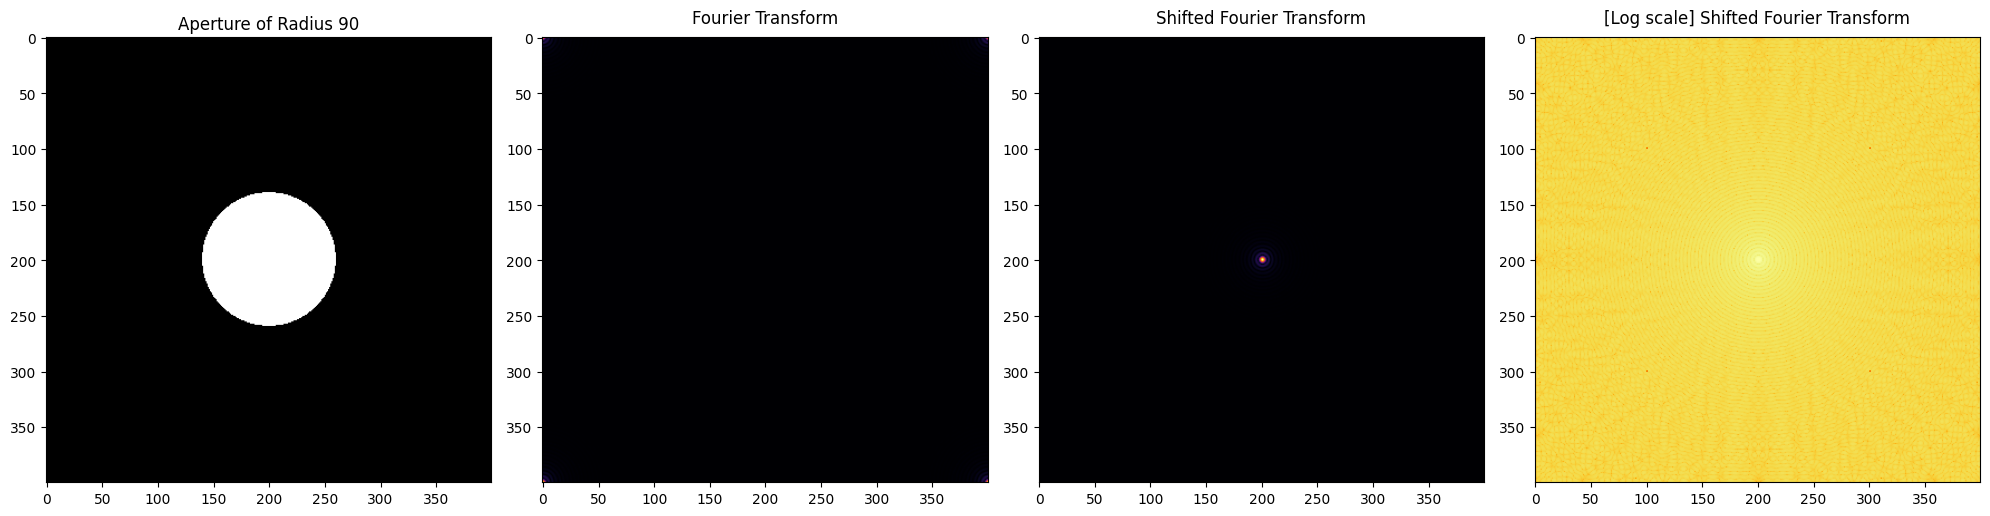

In [98]:
show_fft(circ(10), "Aperture of Radius 50")
show_fft(circ(20), "Aperture of Radius 70")
show_fft(circ(30), "Aperture of Radius 90")


#### Fourier Transforms of a sinusoidal aperture

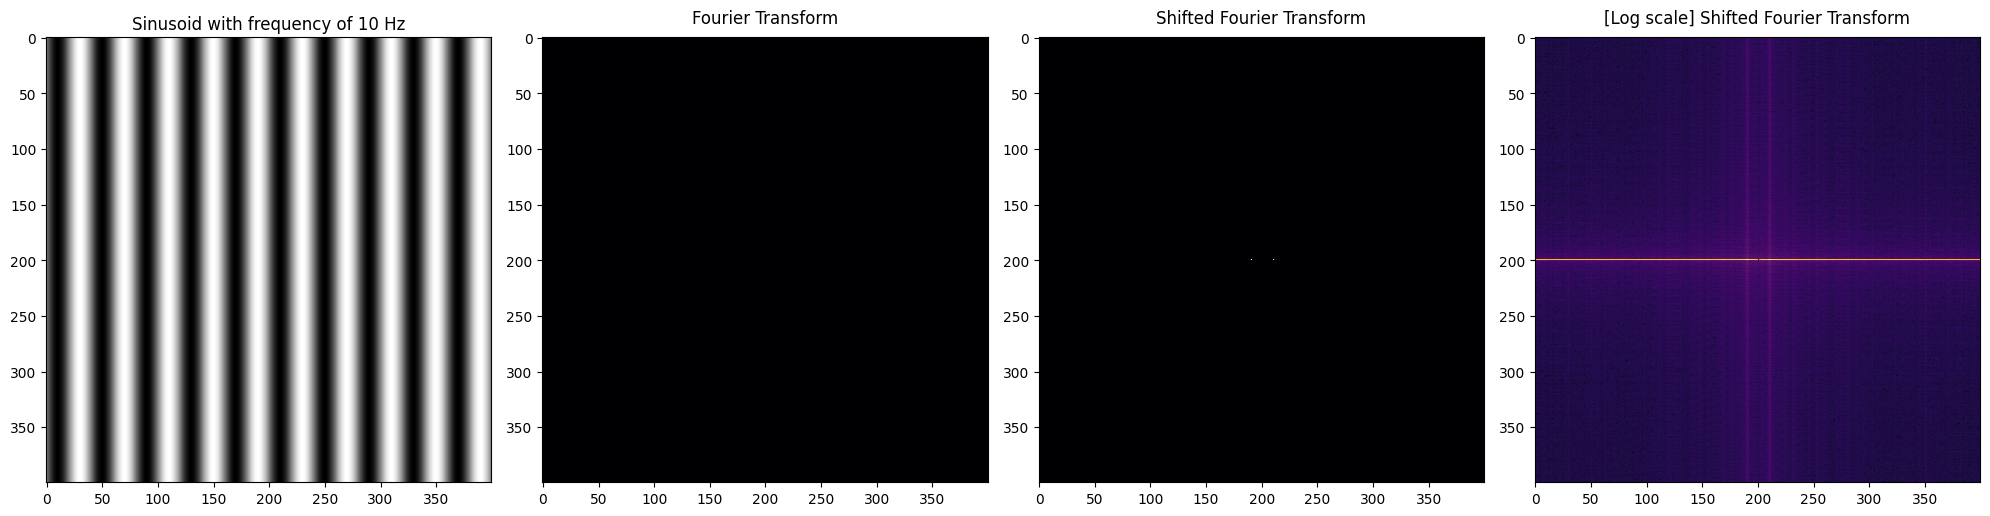

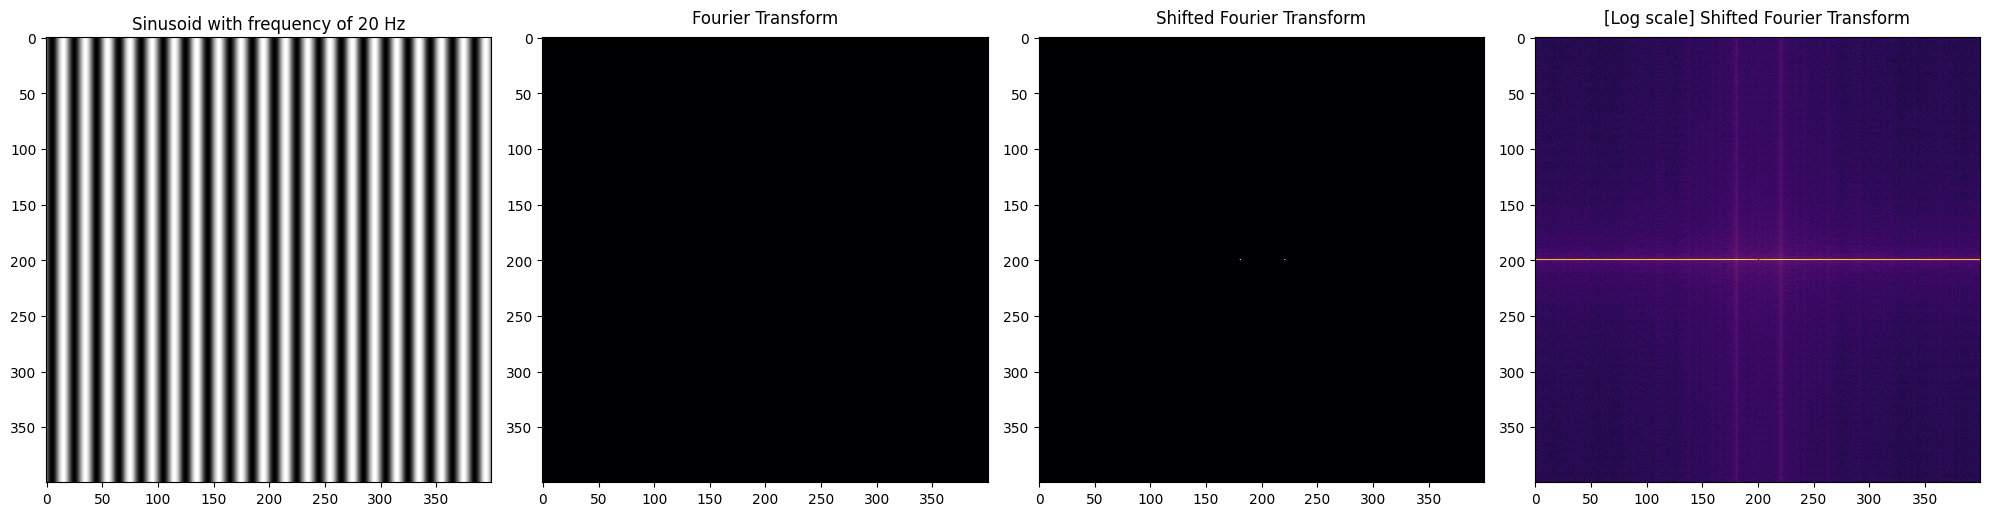

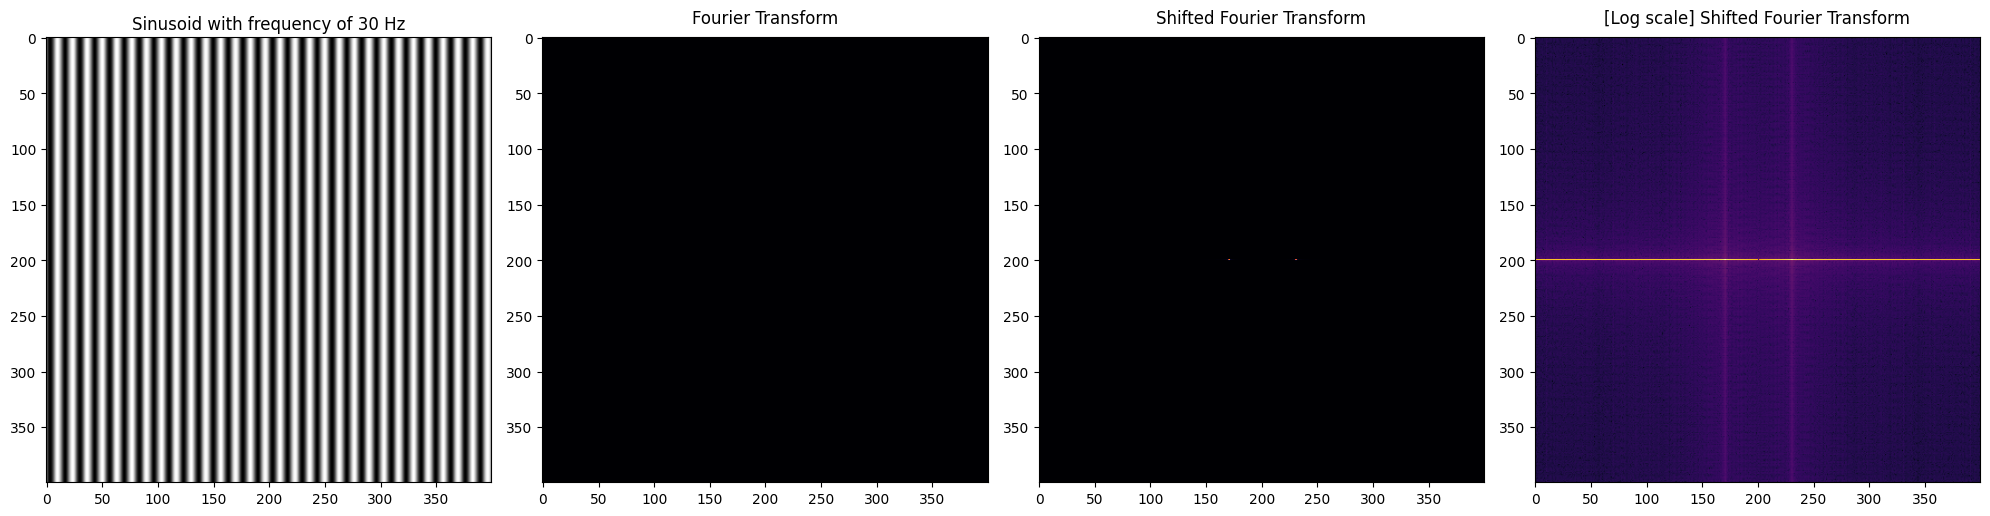

In [99]:
show_fft(sinusoid(10), "Sinusoid with frequency of 10 Hz")
show_fft(sinusoid(20), "Sinusoid with frequency of 20 Hz")
show_fft(sinusoid(30), "Sinusoid with frequency of 30 Hz")


#### Fourier Transform of rotated sinusoidal aperture

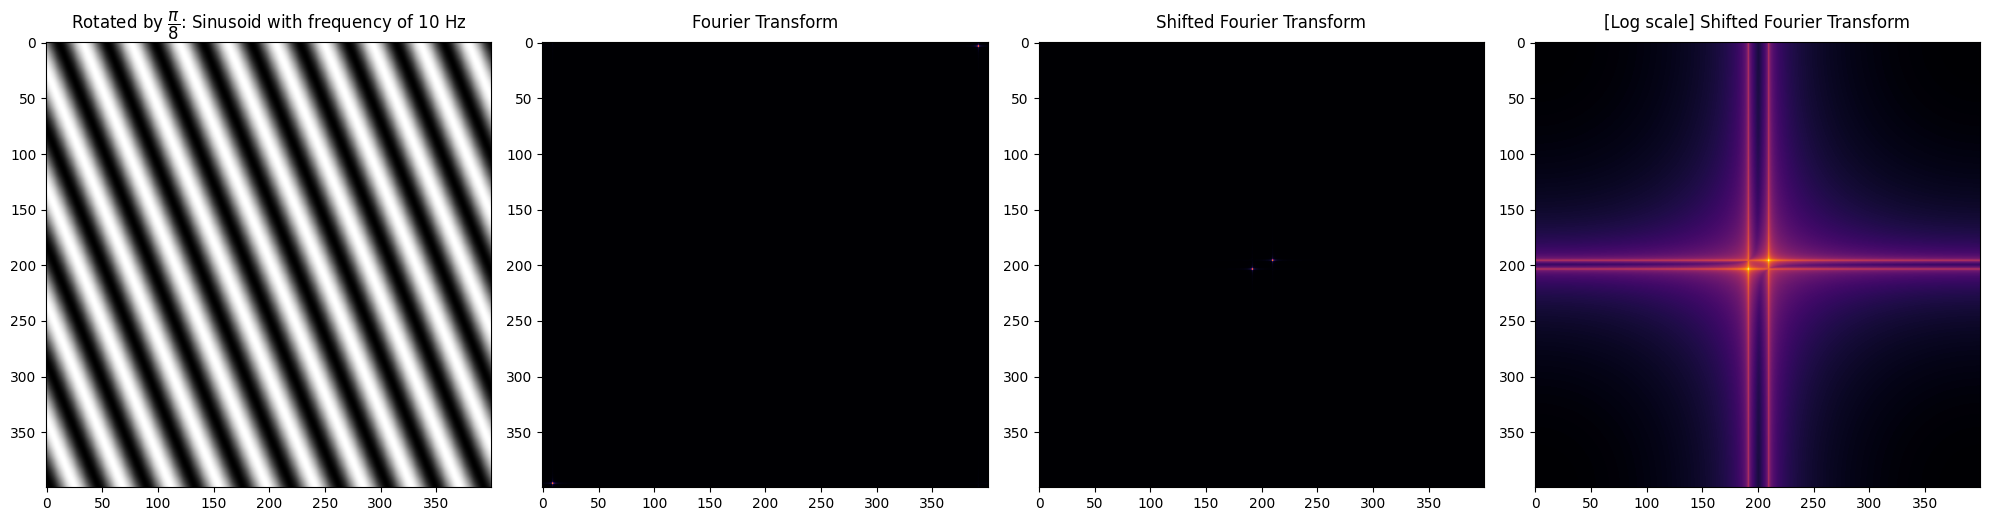

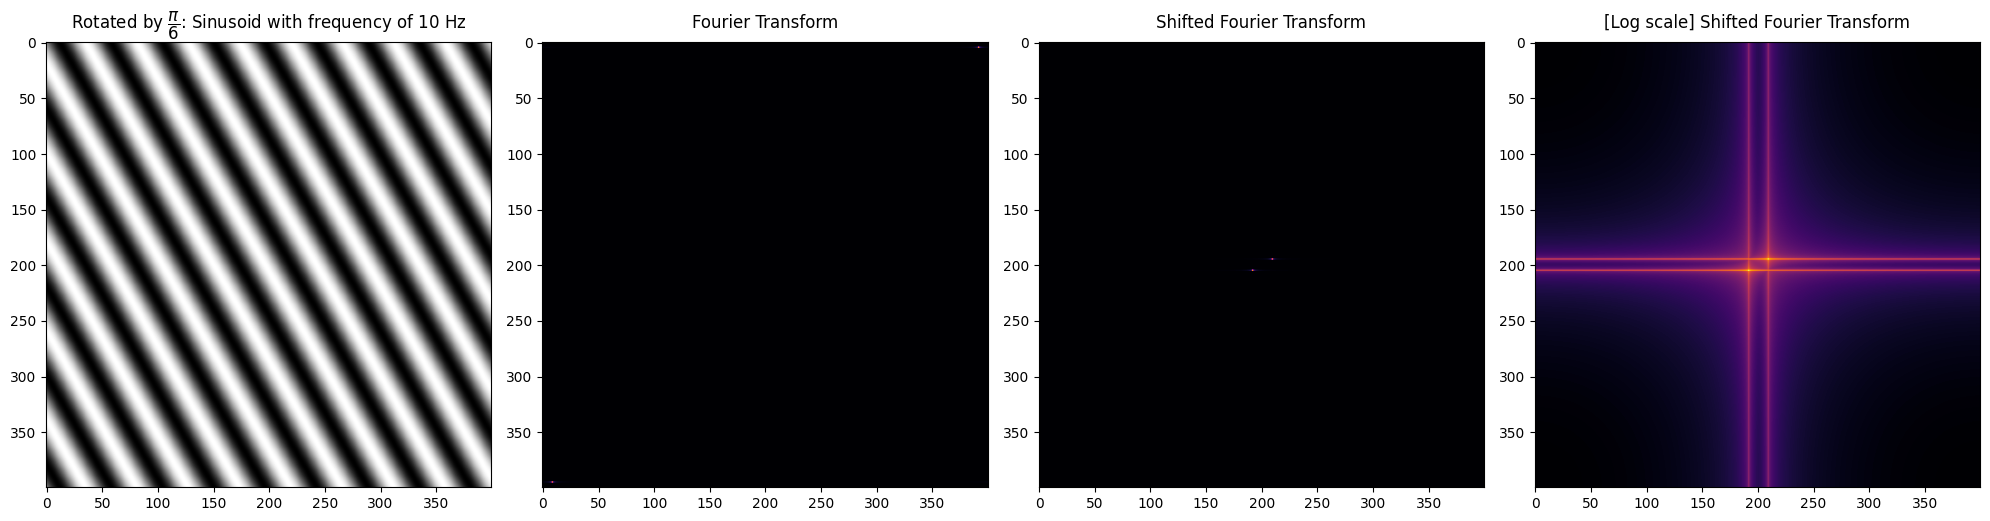

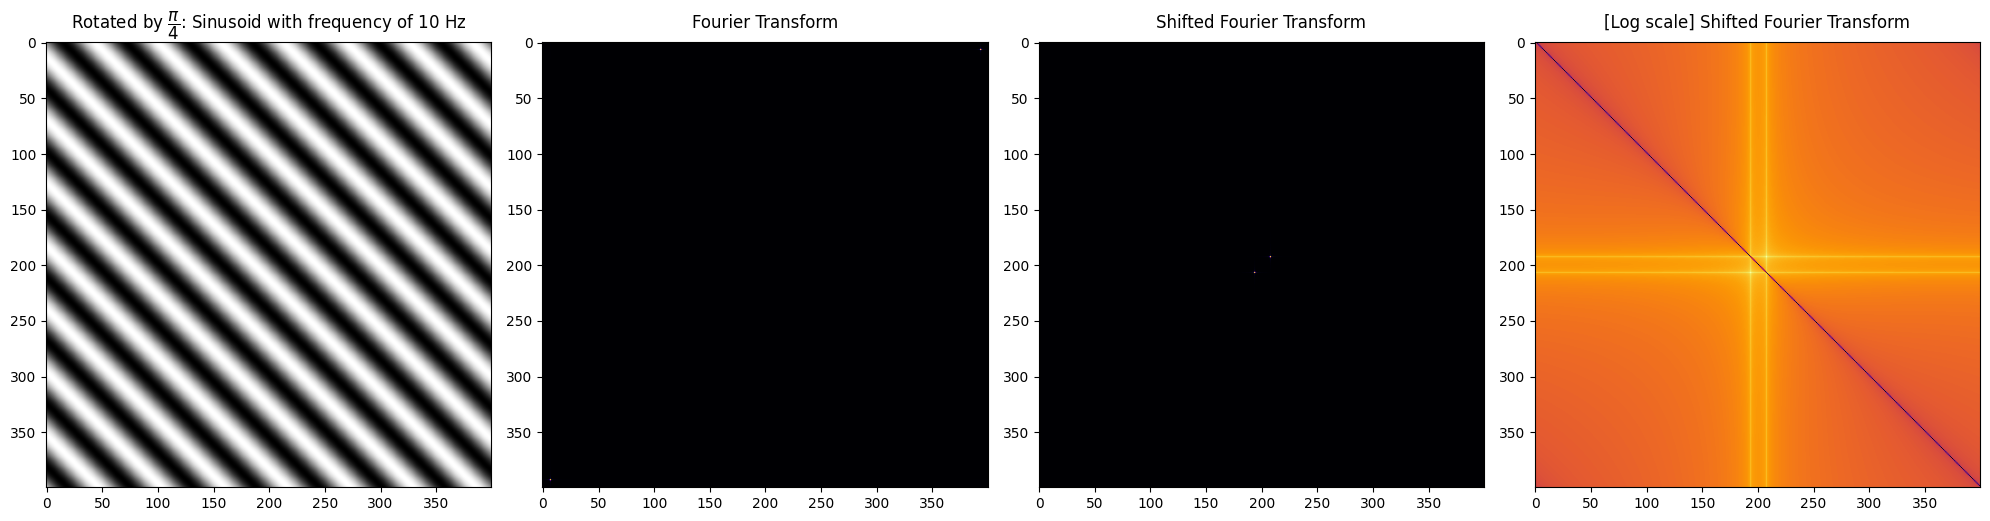

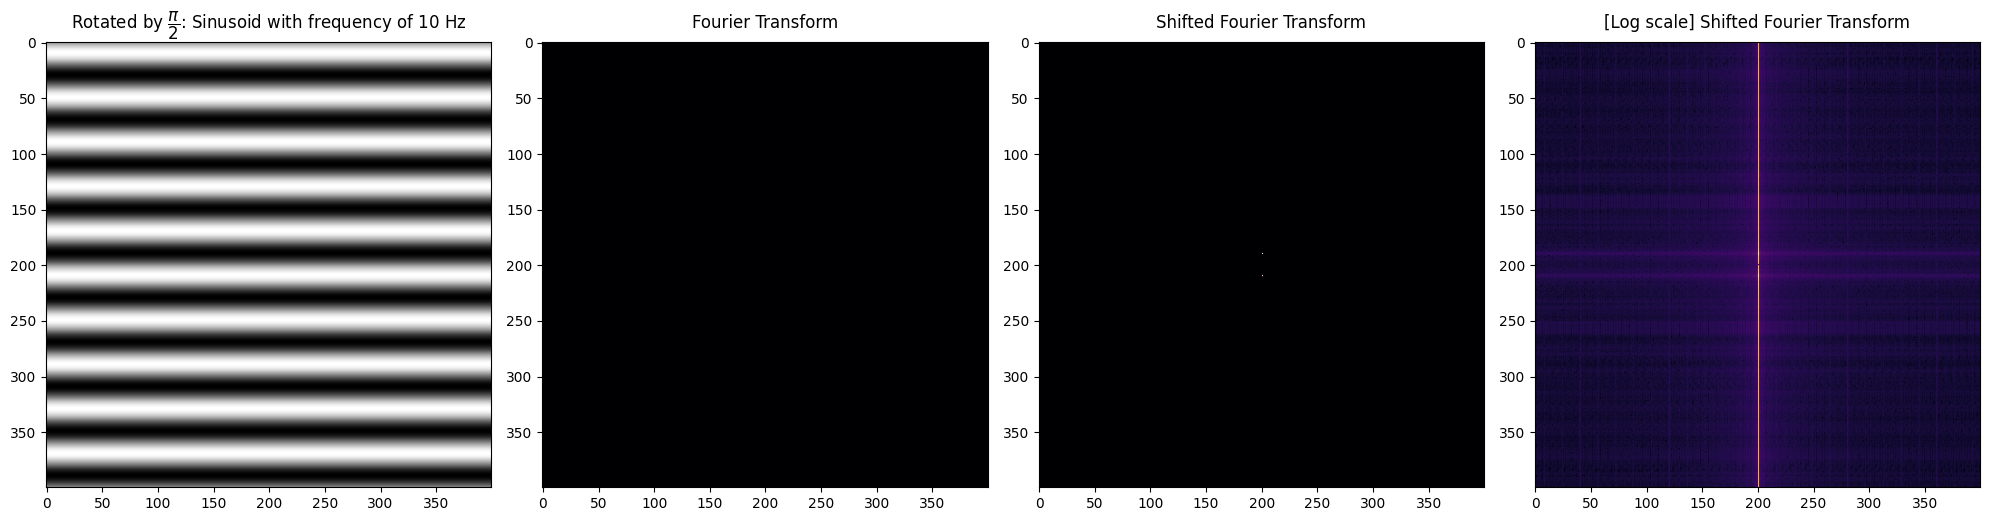

In [100]:
show_fft(sinusoid(10,np.pi/8), "Rotated by $\dfrac{\pi}{8}$: Sinusoid with frequency of 10 Hz")
show_fft(sinusoid(10,np.pi/6), "Rotated by $\dfrac{\pi}{6}$: Sinusoid with frequency of 10 Hz")
show_fft(sinusoid(10,np.pi/4), "Rotated by $\dfrac{\pi}{4}$: Sinusoid with frequency of 10 Hz")
show_fft(sinusoid(10,np.pi/2), "Rotated by $\dfrac{\pi}{2}$: Sinusoid with frequency of 10 Hz")

#### Fourier transform of a grayscale image

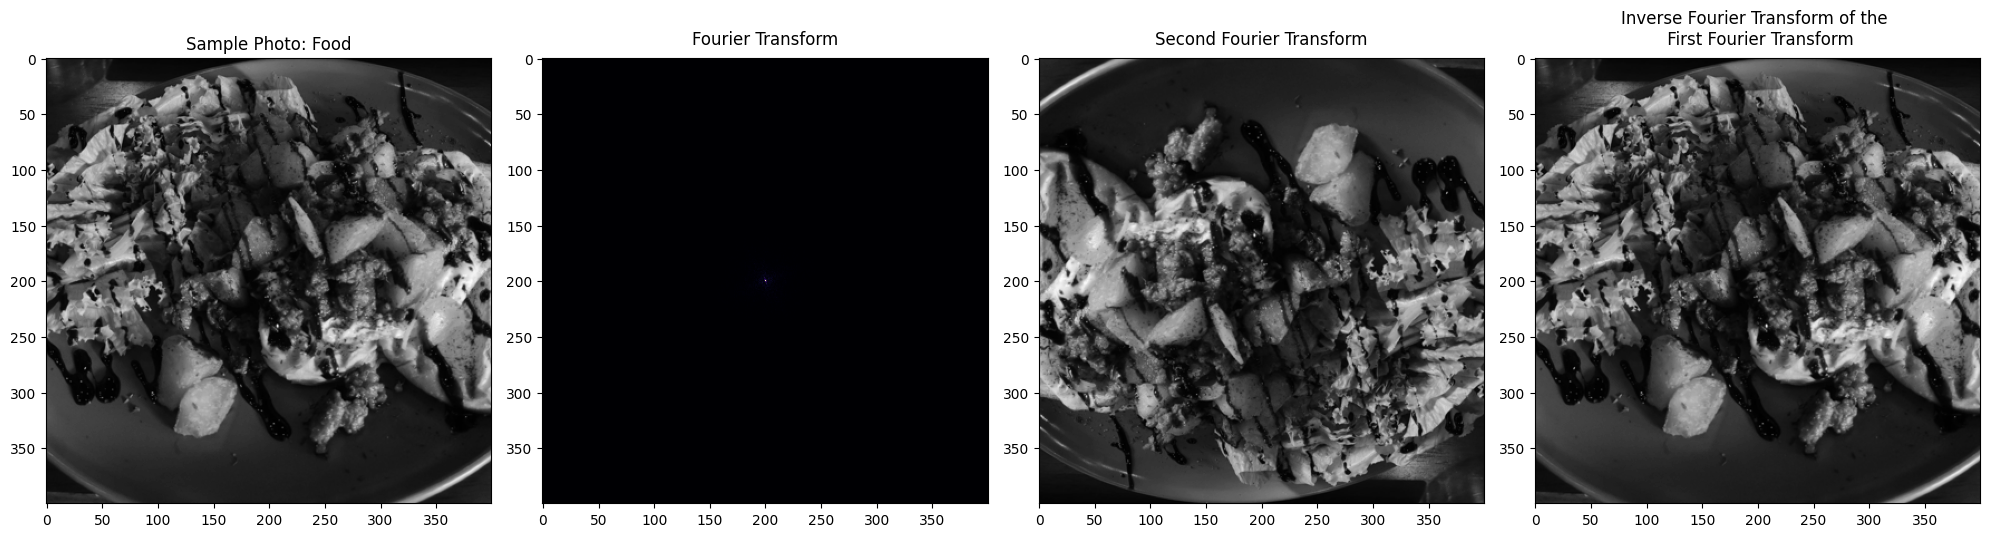

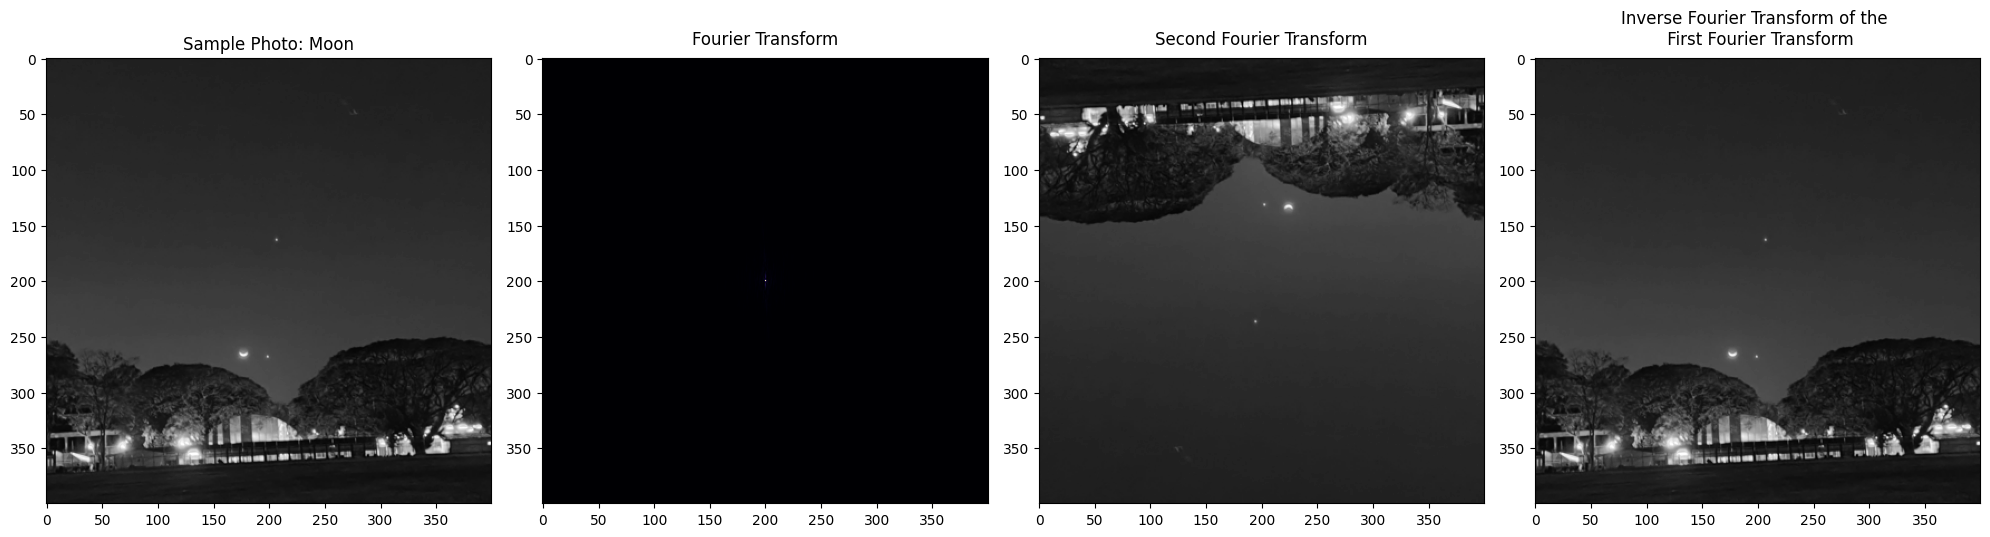

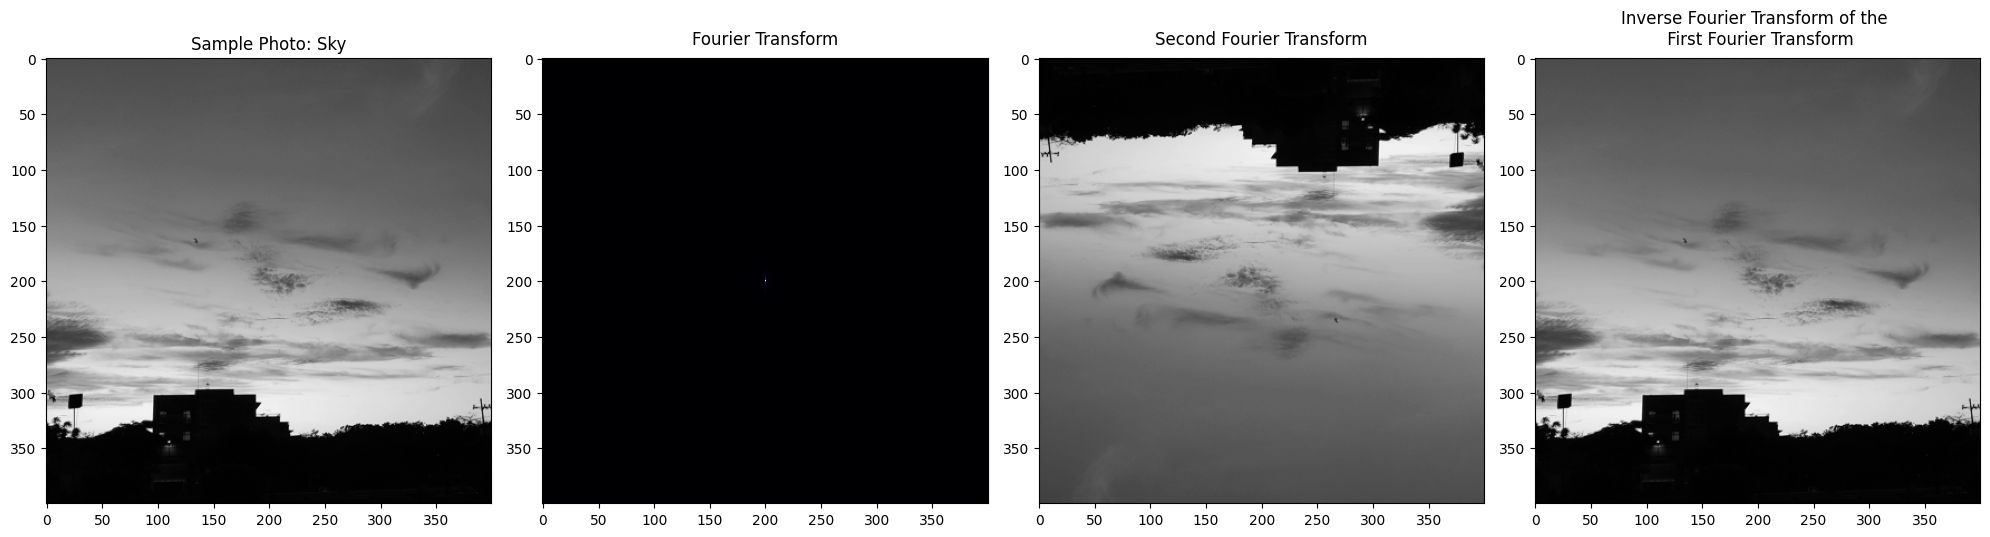

Showing the log scales


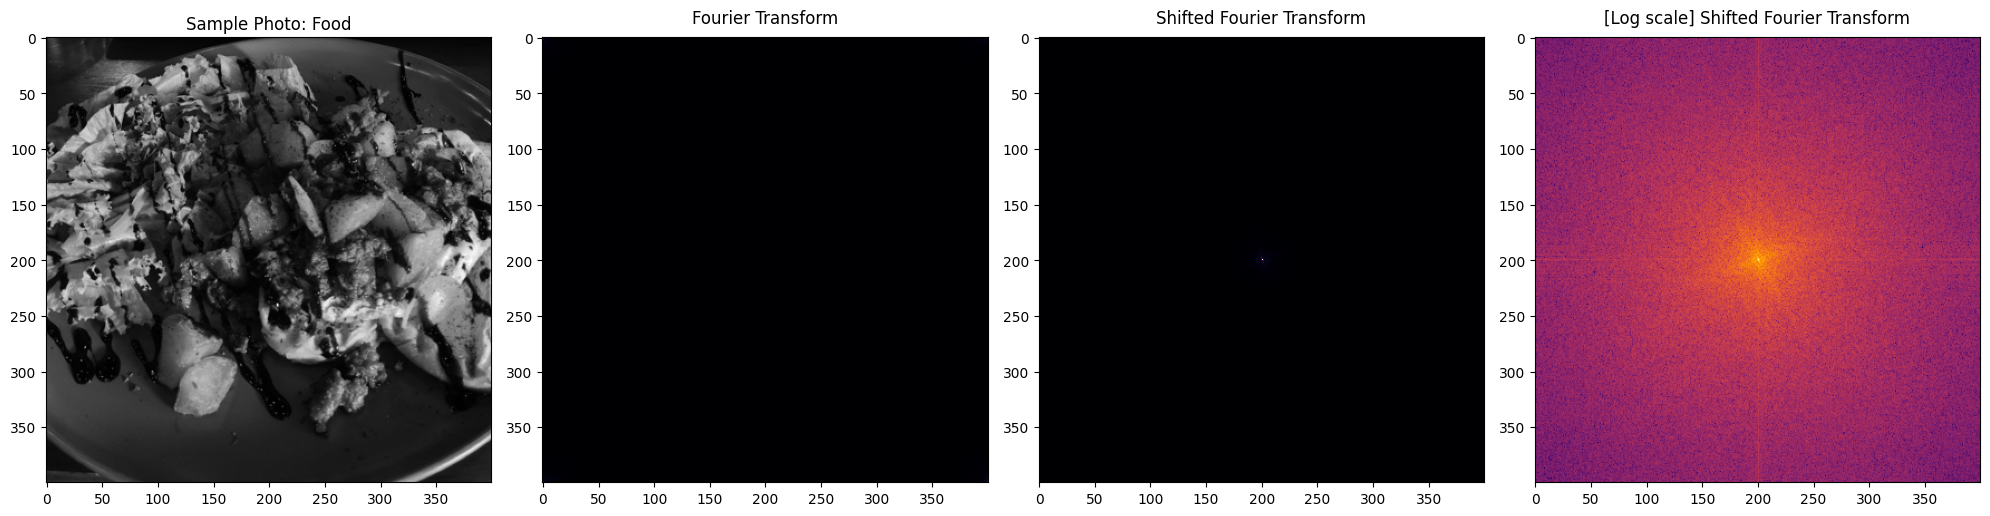

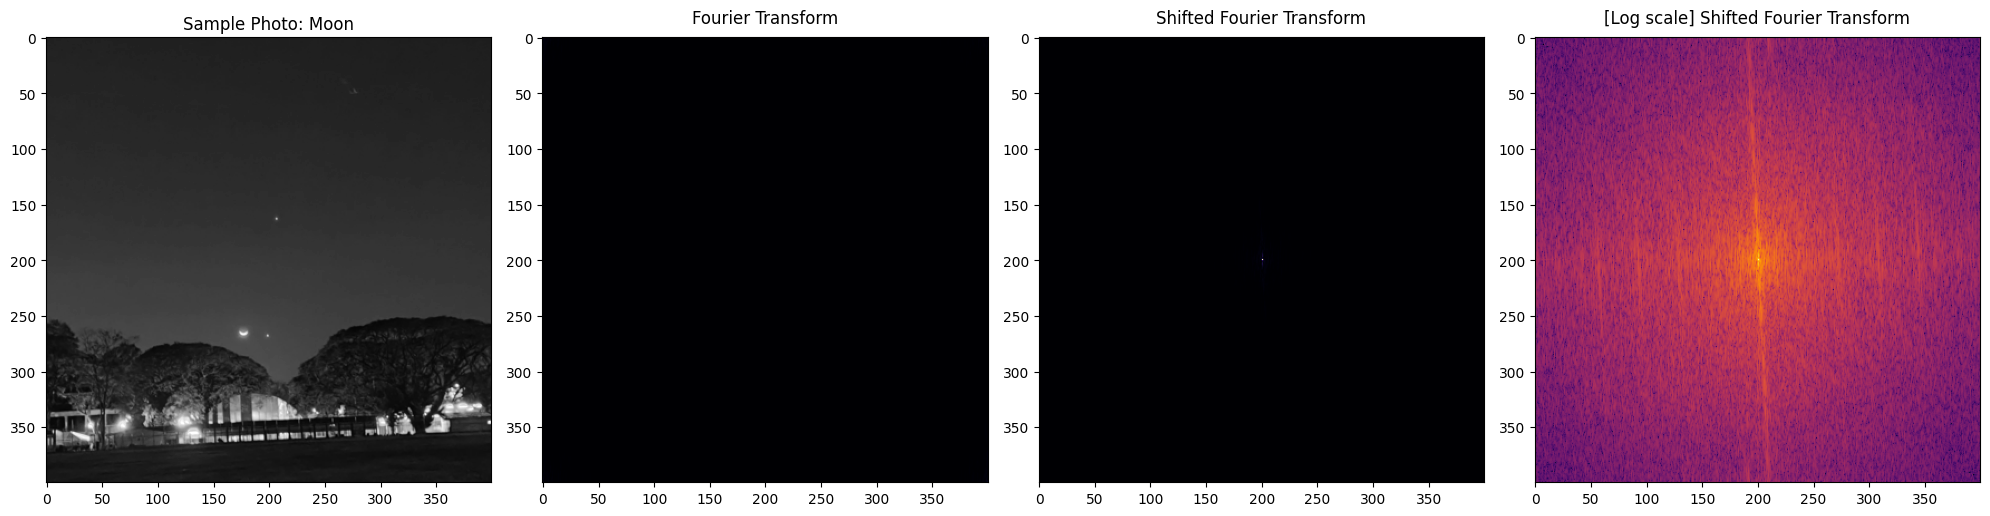

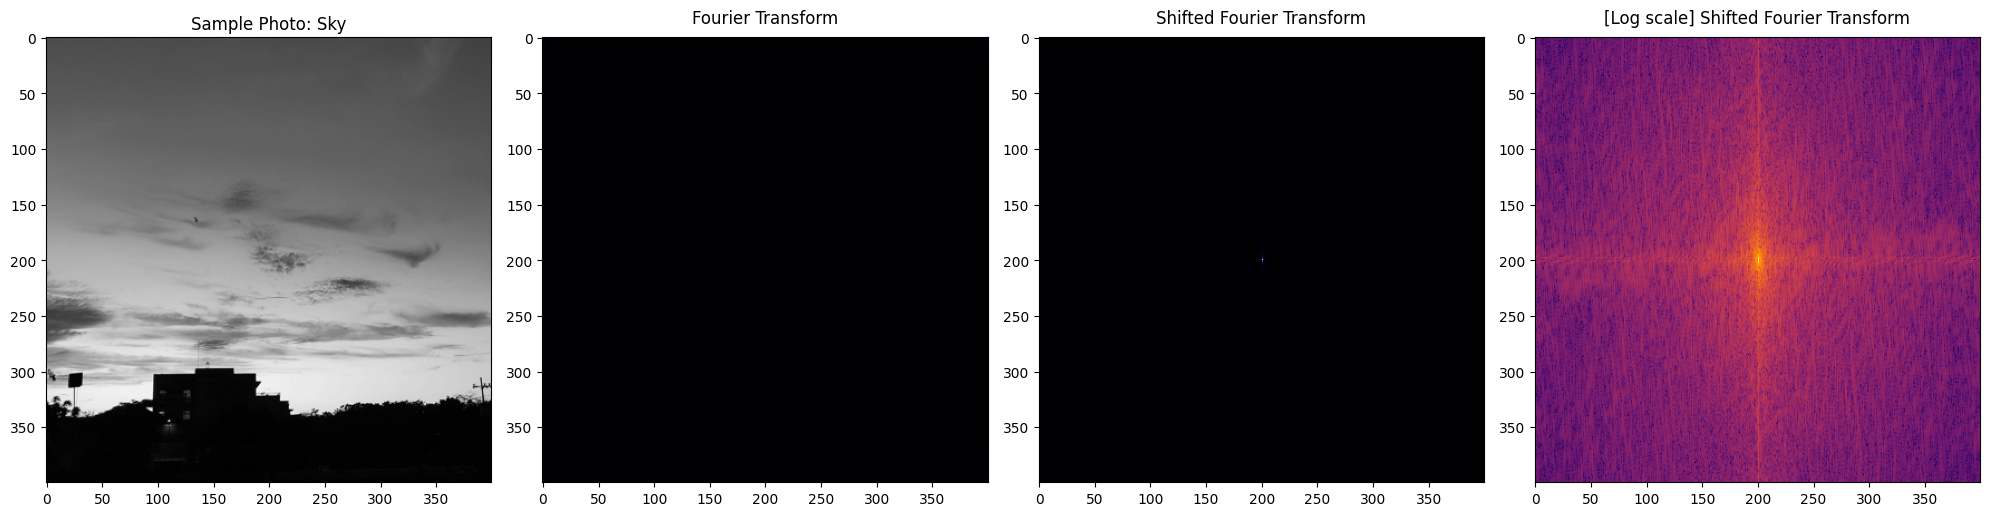

In [101]:
image_fft(conv_gs("square_food.jpg"), "Sample Photo: Food")
image_fft(conv_gs("square_moon.jpg"), "Sample Photo: Moon")
image_fft(conv_gs("square_sky.jpg"), "Sample Photo: Sky")

print("Showing the log scales")
show_fft(conv_gs("square_food.jpg"), "Sample Photo: Food")
show_fft(conv_gs("square_moon.jpg"), "Sample Photo: Moon")
show_fft(conv_gs("square_sky.jpg"), "Sample Photo: Sky")

#### Convolution of NIP logo

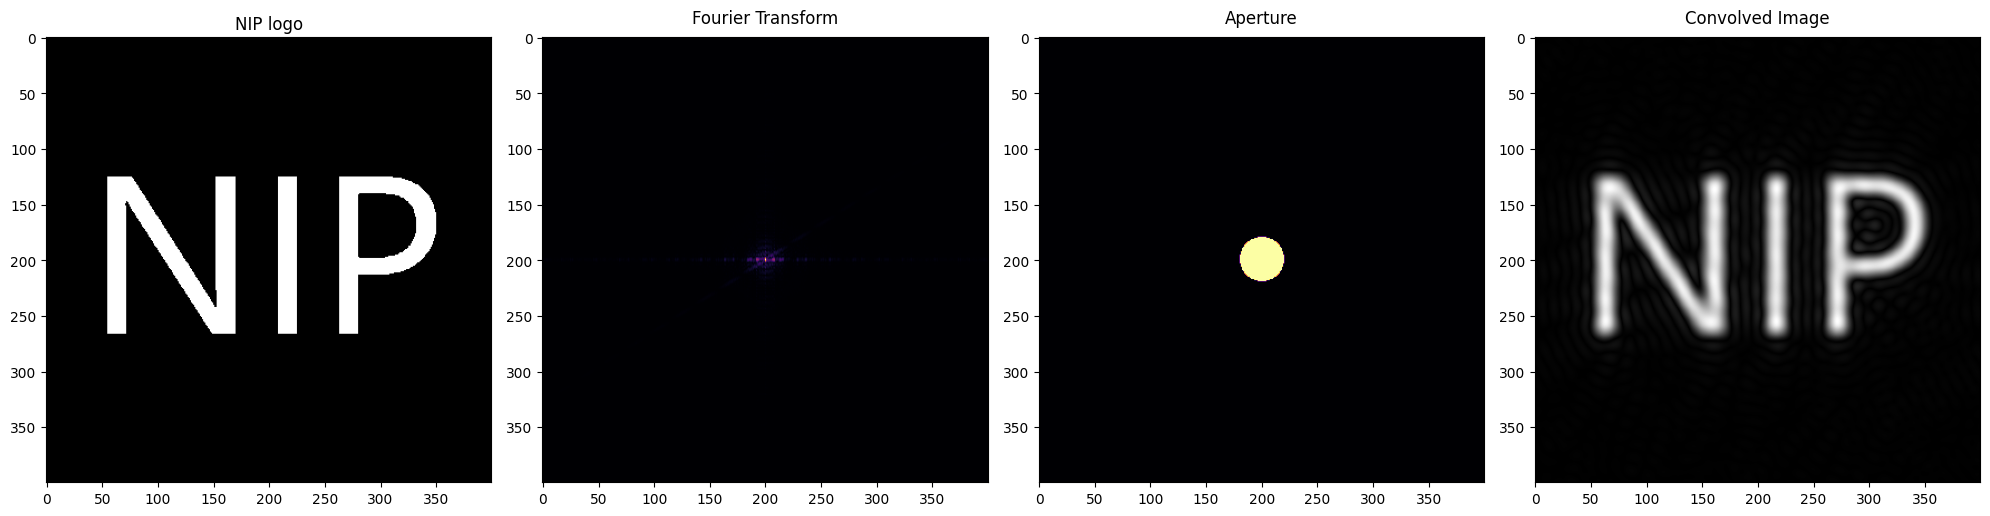

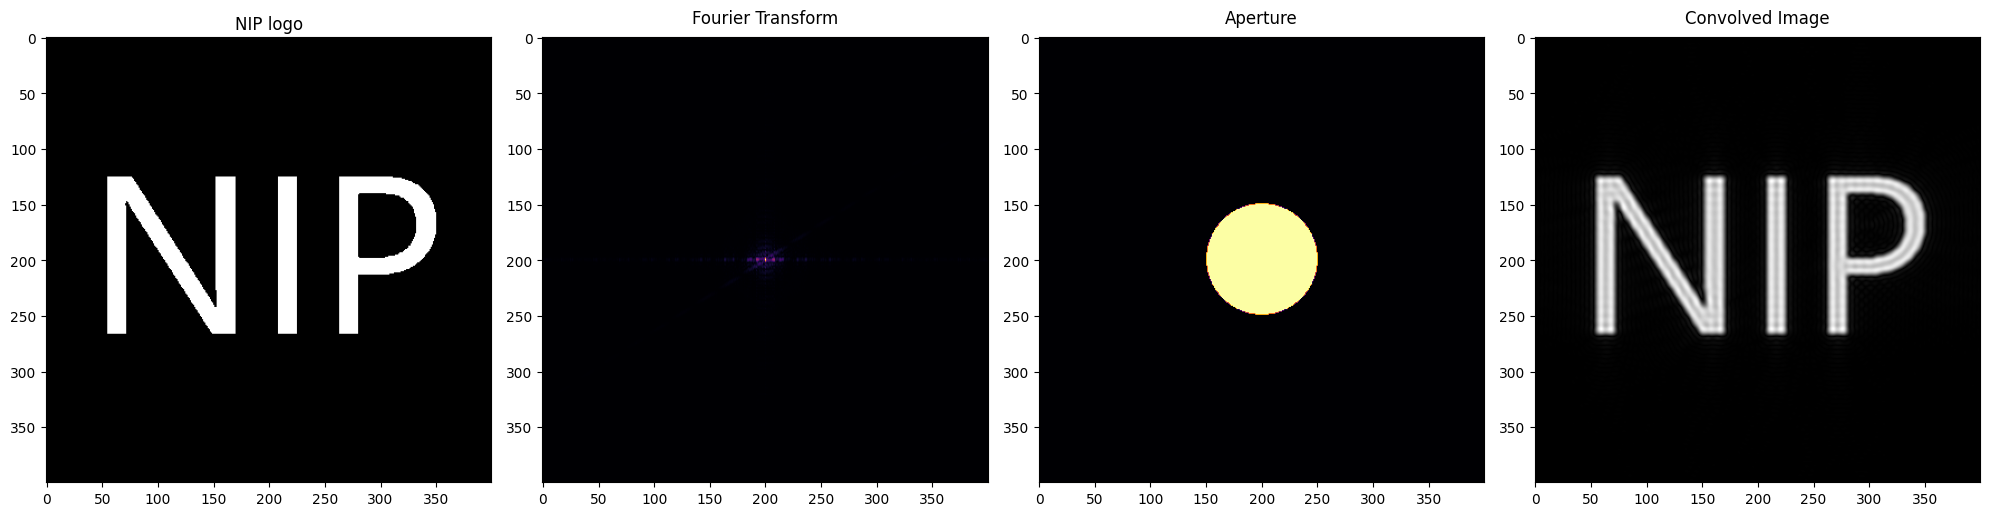

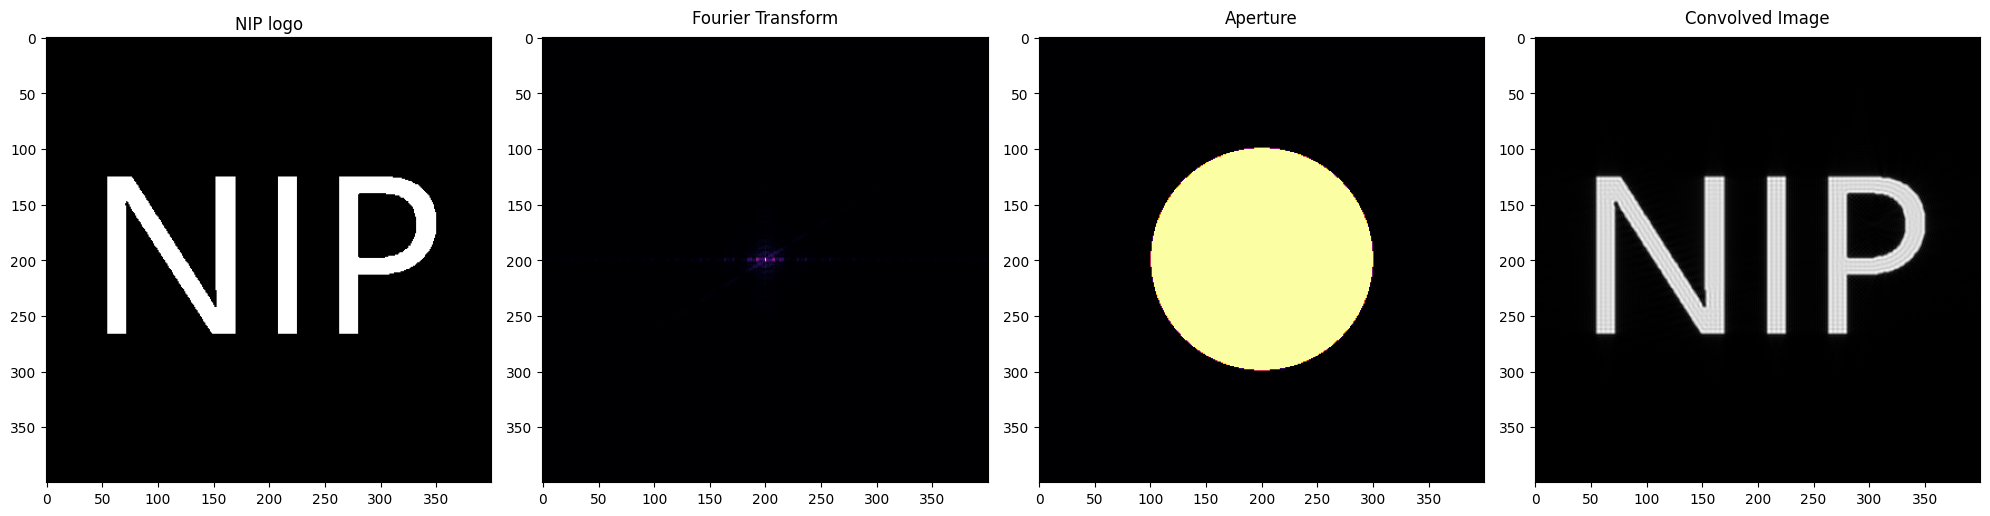

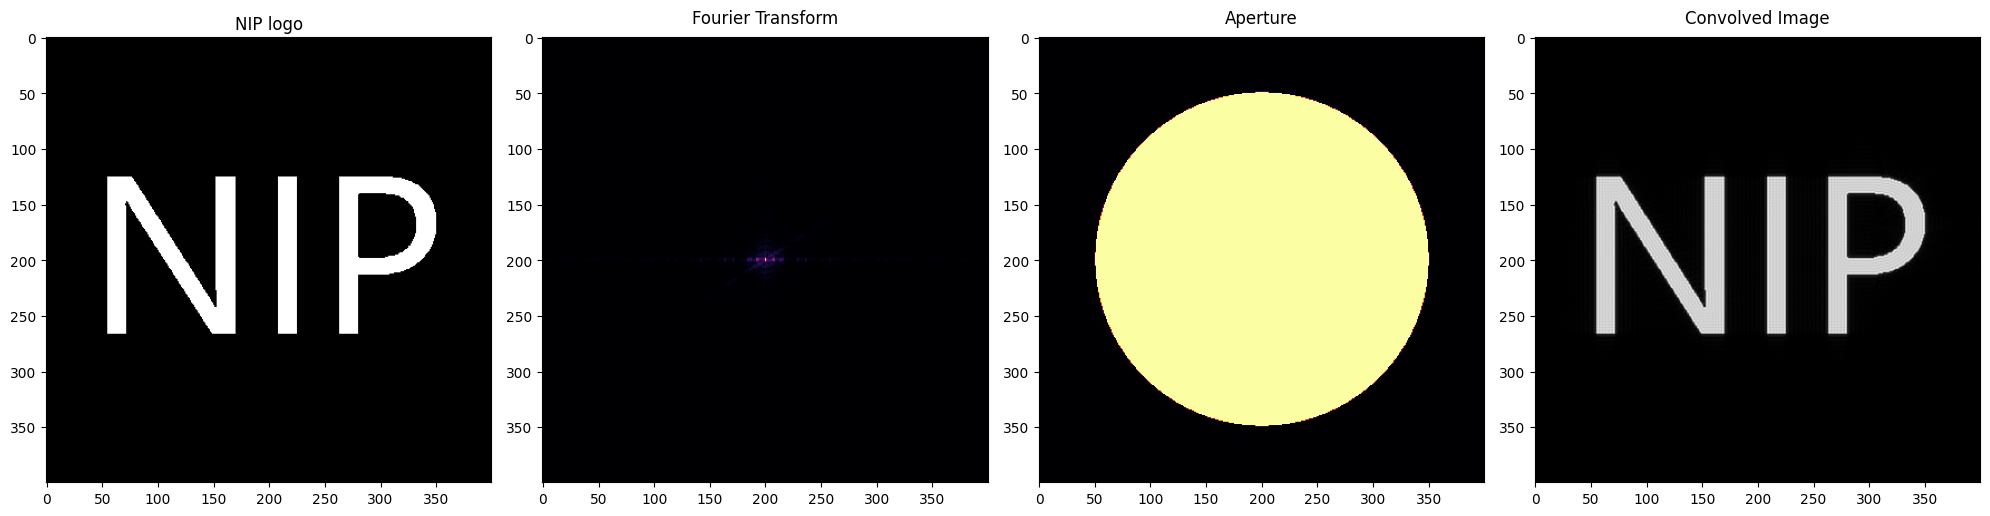

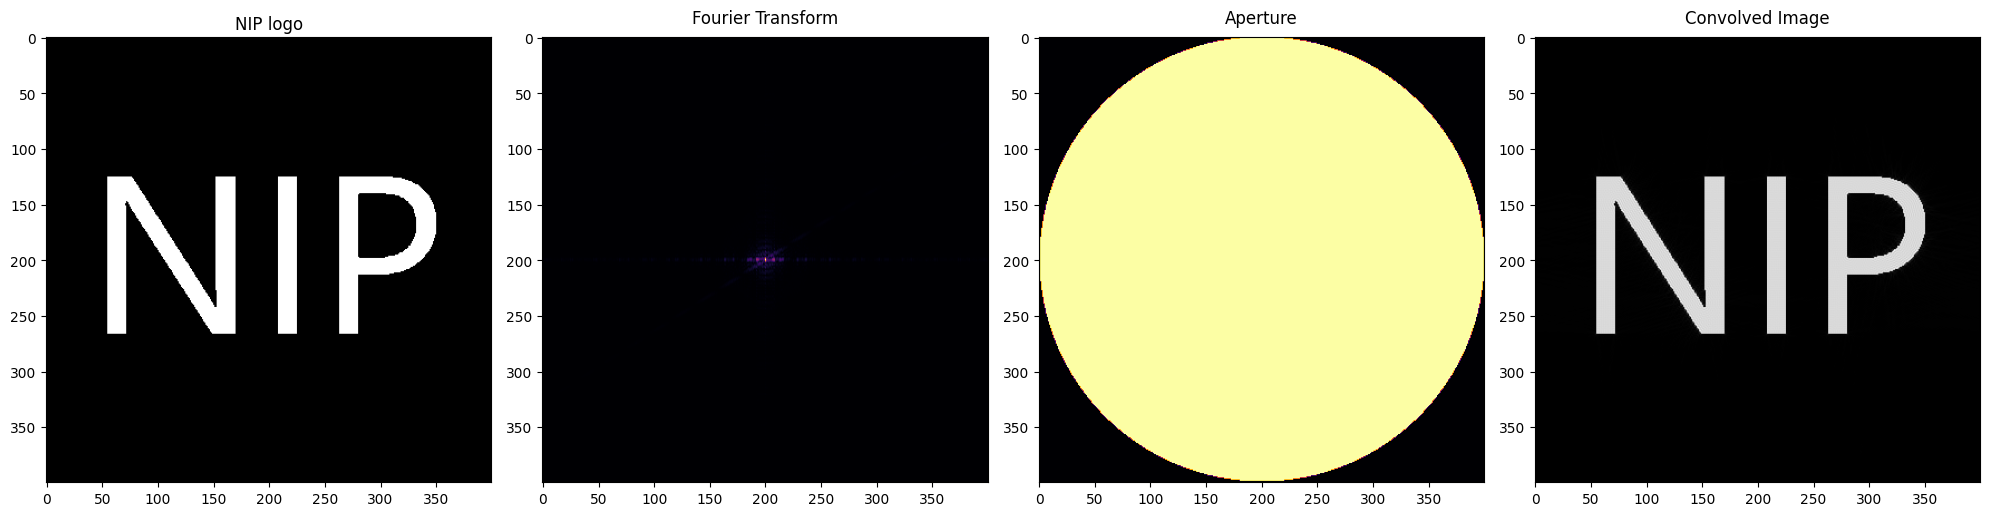

In [132]:
convolve(conv_gs("NIP.tif", bw = True), circ(0.1*100), "NIP logo")
convolve(conv_gs("NIP.tif", bw = True), circ(0.25*100), "NIP logo")
convolve(conv_gs("NIP.tif", bw = True), circ(0.5*100), "NIP logo")
convolve(conv_gs("NIP.tif", bw = True), circ(0.75*100), "NIP logo")
convolve(conv_gs("NIP.tif", bw = True), circ(1*100), "NIP logo")

#### For James Webb telescope as aperture

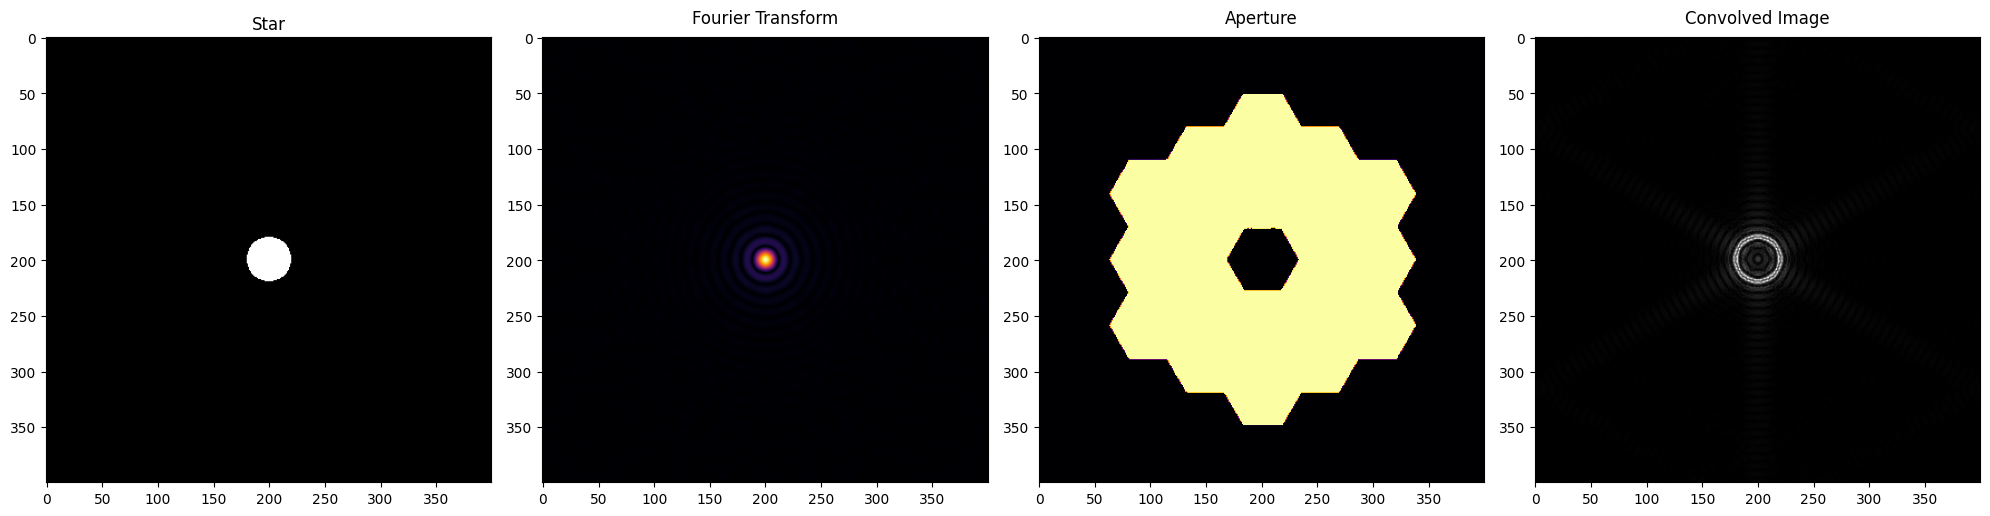

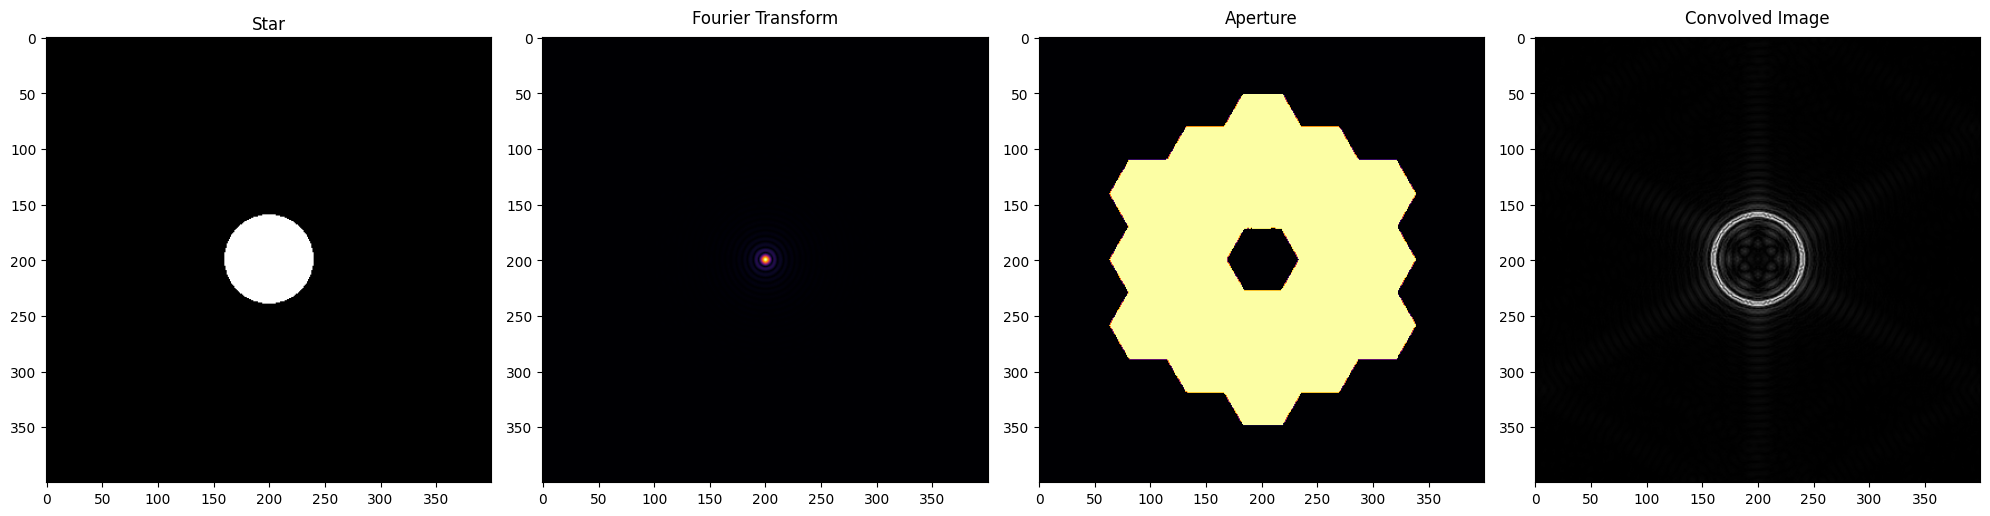

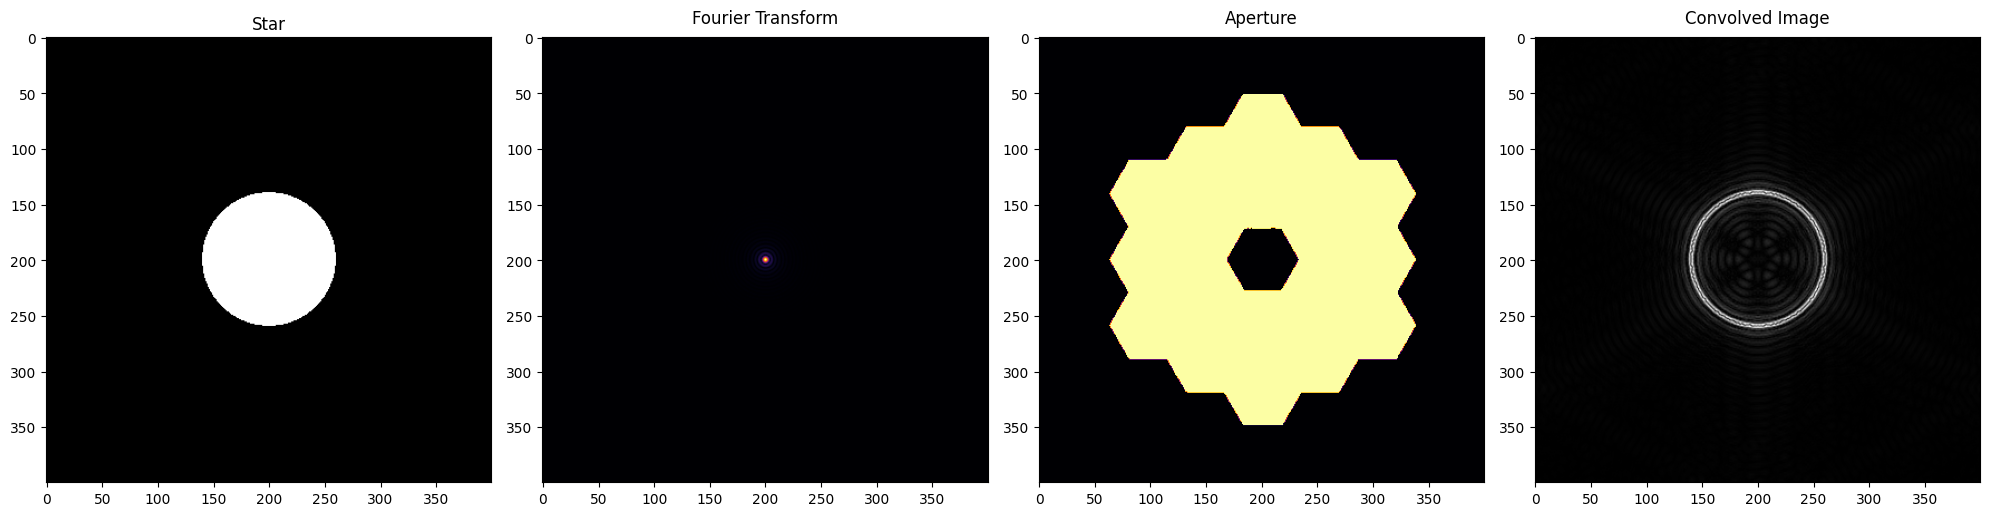

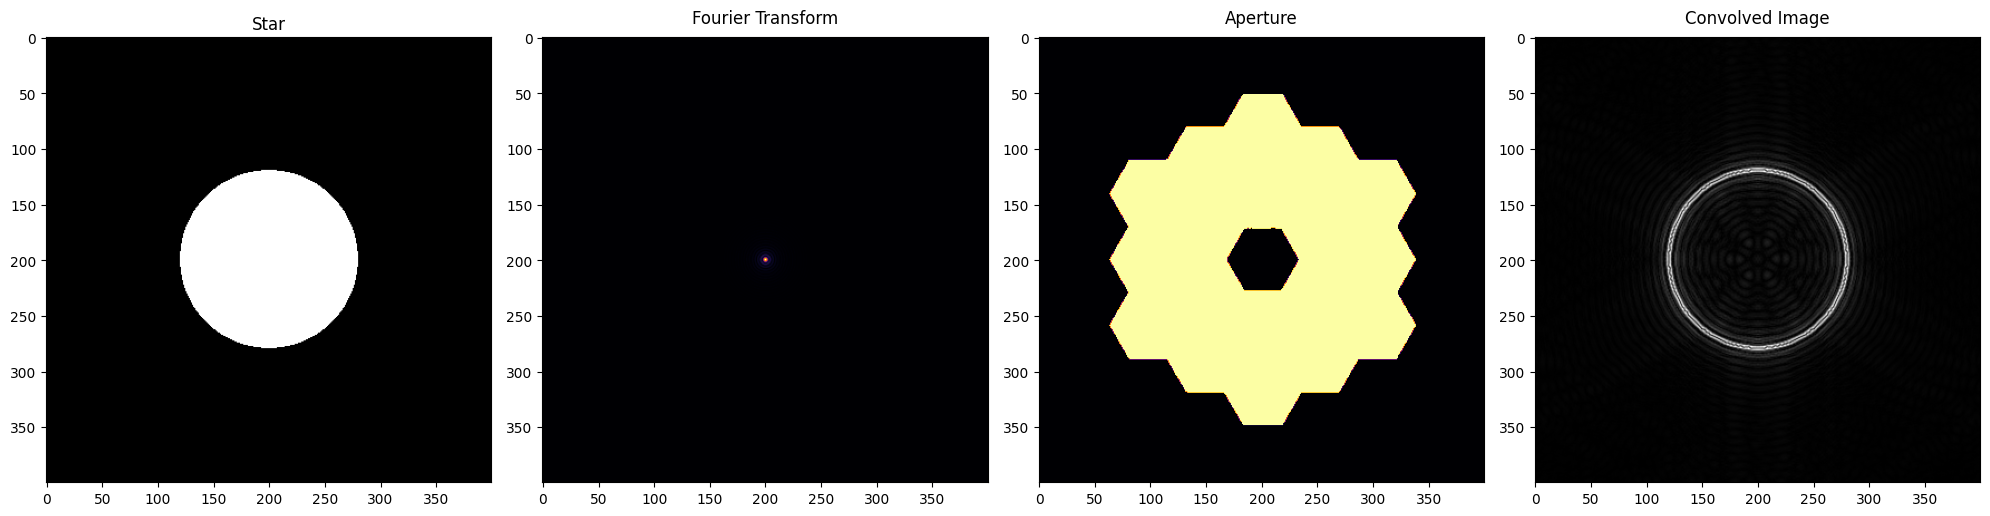

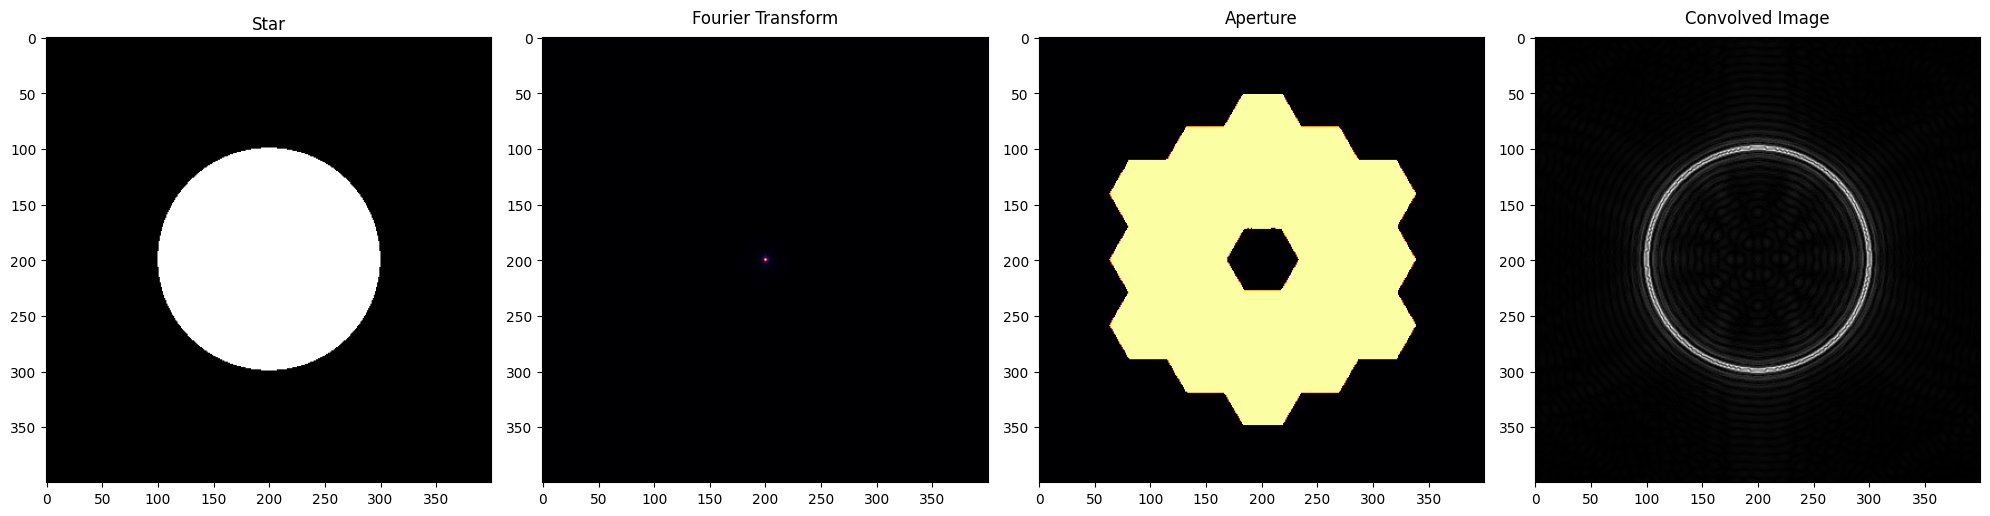

In [133]:
convolve(circ(0.1*100), conv_gs("jw.jpg", bw = True, inv = True), "Star")
convolve(circ(0.2*100), conv_gs("jw.jpg", bw = True, inv = True), "Star")
convolve(circ(0.3*100), conv_gs("jw.jpg", bw = True, inv = True), "Star")
convolve(circ(0.4*100), conv_gs("jw.jpg", bw = True, inv = True), "Star")
convolve(circ(0.5*100), conv_gs("jw.jpg", bw = True, inv = True), "Star")


#### Template matching using correlation

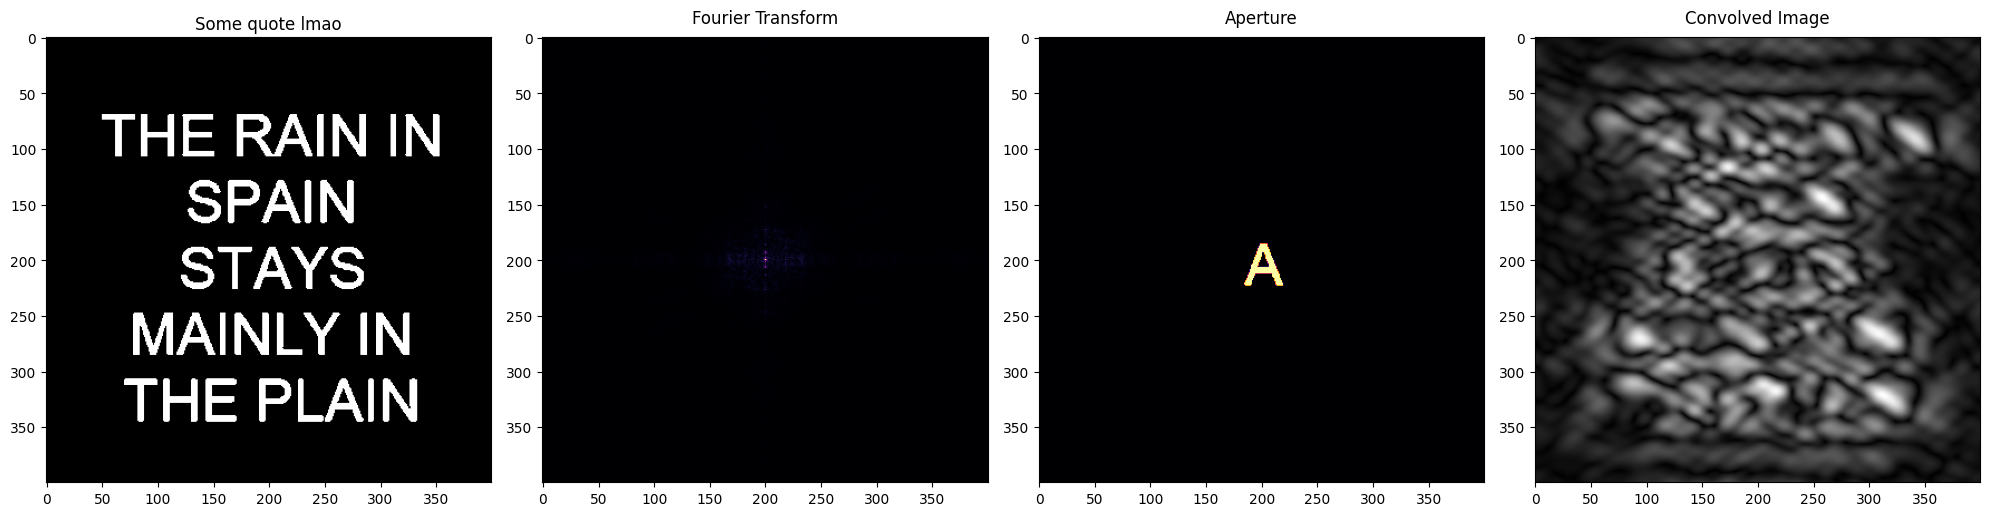

In [137]:
convolve(conv_gs("some quote.tif", bw = True, inv = True), conv_gs("A.tif", bw = True, inv = True), "Some quote lmao", fft_aperture = True)